In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [2]:
### Reading all file from glob module 
### The glob module is used to retrieve files/pathnames matching a specified pattern. 

path = r'E:\project\Transport_Vehicle_Online_Sales\Data_Vehicle_Sales'
all_files = glob.glob(path + "/*.csv")

all_file_list= []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, encoding = "latin")
    all_file_list.append(df)


In [3]:
### Concating all the dataframes of differnt csv files

data1 = pd.concat(all_file_list[1:], axis=0, ignore_index=True)

In [4]:
### Droped 'fromdata' and 'todate' columns from "data1" dataframe

data1 = data1.drop(['fromdate', 'todate'], axis=1)

### Droped 'Approved_Dt' columns
### data2 in this dataframe InsuranceCompany name is given

data2 = all_file_list[0].drop(['Apprved_Dt'], axis=1)

### Droped 'InsuranceCompany' columns from data2 inorder to make the frame collumns and data2Temp columns equal

data2Temp = data2.drop(['InsuranceCompany'], axis=1)

In [5]:
data2Temp.columns

Index(['rowid', 'Model_Desc', 'Fuel', 'Colour', 'V_Vhc_ClsID', 'Make_Yr',
       'SeatingCapacity', 'IncValidTo', 'SecondVehicle', 'TempRegnNo',
       'C_Transport', 'Manufacturer_Name', 'OfficeCd'],
      dtype='object')

In [6]:
### change columns names

data2Temp.columns = ['slno', 'modelDesc', 'fuel', 'colour', 'vehicleClass', 'makeYear',
        'seatCapacity', 'insuranceValidity', 'secondVehicle',
        'tempRegistrationNumber', 'category', 'makerName', 'OfficeCd']

In [7]:
### Again concating two data frames i.e frame and data2Temp

li=[data1, data2Temp]

data1 = pd.concat(li, axis=0, ignore_index=True)

In [8]:
### Dropped slno columns from data1 

data1=data1.drop(['slno'], axis=1)

In [9]:
data1.head(2)

,modelDesc,fuel,colour,vehicleClass,makeYear,seatCapacity,insuranceValidity,secondVehicle,tempRegistrationNumber,category,makerName,OfficeCd
0,TVS JUPITER ZX BSVI,PETROL,PURPLE,MOTOR CYCLE,01/02/2020,2,30/04/2025,N,TS16AFTR8957,Non Transport,TVS MOTOR COMPANY LTD,RTA NIZAMABAD
1,TVS XL 100 HEAVY DUTY I-TOUCH START BSVI,PETROL,GREEN,MOTOR CYCLE,01/02/2020,2,30/04/2025,N,TS16AFTR8953,Non Transport,TVS MOTOR COMPANY LTD,RTA MEDAK


In [10]:
### drop insuranceValidity

data1 = data1.drop(['insuranceValidity'], axis=1)

In [11]:
data1['fuel'].unique()

array(['PETROL', 'DIESEL', nan, 'BATTERY', '-1', 'CNG PETROL',
       'PETROL LPG', 'LPG', 'CNG', 'DIESEL ELECTRIC', 'PETROL ELECTRIC',
       'DIESEL LPG', 'P', 'D', 'L', 'B', 'C'], dtype=object)

In [12]:
data1.loc[data1['fuel']=='D', 'fuel'] = 'DIESEL'
data1.loc[data1['fuel']=='P', 'fuel'] = 'PETROL'
data1.loc[data1['fuel']=='L', 'fuel'] = 'LPG'
data1.loc[data1['fuel']=='B', 'fuel'] = 'BATTERY'
data1.loc[data1['fuel']=='C', 'fuel'] = 'CNG'

In [13]:
data1['fuel'].unique()

array(['PETROL', 'DIESEL', nan, 'BATTERY', '-1', 'CNG PETROL',
       'PETROL LPG', 'LPG', 'CNG', 'DIESEL ELECTRIC', 'PETROL ELECTRIC',
       'DIESEL LPG'], dtype=object)

## Handling missing values

In [14]:
data1.isnull().sum()

modelDesc                      0
fuel                       88692
colour                      1899
vehicleClass                   0
makeYear                       0
seatCapacity                   0
secondVehicle                  0
tempRegistrationNumber         0
category                       0
makerName                      0
OfficeCd                  124715
dtype: int64

In [15]:
data1[data1['fuel'].isnull()]['vehicleClass'].value_counts()

Trailer For Commercial Use                    45971
Trailer for Agriculture Purpose               42391
MOTOR CYCLE                                     152
MOTOR CAR                                       105
Tractor for Agricultural Purpose                 18
Luxory Tourist Cab                               16
Motor Cab                                        15
Chassis Transport                                 9
Tractor for Commercial Use                        4
Tractor Driven Combined Harvester                 4
Goods Carriage                                    2
Loader                                            2
Three Wheeled Goods Vehicle                       2
Vehicle Fitted with Construction Equipment        1
Name: vehicleClass, dtype: int64

In [16]:
sop=data1[data1['vehicleClass']=='Trailer For Commercial Use']['fuel'].notnull()
sop=list(sop[sop].index)
data1.loc[sop, 'fuel'].value_counts()

DIESEL    1363
-1        1310
Name: fuel, dtype: int64

In [17]:
### Gathering all notnull value of  the different catogery of model name i.e 'modelDesc' depending on its fuel type
### Gathering of fuel type value from 'vehicleClass' of 'Trailer For Commercial Use'

TC = data1[data1['vehicleClass'] == 'Trailer For Commercial Use']['fuel'].notnull()
TC = list(TC[TC].index)

dieselName = data1.loc[TC, 'fuel'] == 'DIESEL'
dieselName = list(dieselName[dieselName].index)
dieselName = list(data1.iloc[dieselName,1].unique())

oneName = data1.loc[TC, 'fuel'] == '-1'
oneName = list(oneName[oneName].index)
oneName = list(data1.loc[oneName, 'modelDesc'].unique())

In [18]:
TC = data1[data1['vehicleClass'] == 'Trailer For Commercial Use']['fuel'].isnull()
TC = list(TC[TC].index)
data1.loc[TC, 'modelDesc'].isin(dieselName).value_counts()

False    45971
Name: modelDesc, dtype: int64

In [19]:
TC = data1[data1['vehicleClass'] == 'Trailer For Commercial Use']['fuel'].isnull()
TC = list(TC[TC].index)
dcc=0
occ=0
for i in TC:
    
    if data1.loc[i, 'modelDesc'] in dieselName:
        dcc=dcc+1
        
    elif data1.loc[i, 'modelDesc'] in oneName:
        occ=occ+1
        
print("diesel name of notnull fuel value match with nan fuel value's model name",dcc)

print("-1 name of notnull fuel value match with nan fuel value's model name",occ)

diesel name of notnull fuel value match with nan fuel value's model name 0
-1 name of notnull fuel value match with nan fuel value's model name 41424


In [20]:
### filling missing value based on same model name 
### also noticed that some name are common among diesel and non fuel varient name
### so as per data without fuel varient is large in number and diesel varient is less in number
### so we try to fill diesel value first

dieN = data1.loc[TC,'modelDesc'].isin(dieselName)

oneN = data1.loc[TC,'modelDesc'].isin(oneName)

data1.loc[dieN[dieN].index, 'fuel'] = 'DIESEL'

data1.loc[oneN[oneN].index, 'fuel'] = '-1'

In [21]:
data1[data1['fuel'].isnull()]['vehicleClass'].value_counts()

Trailer for Agriculture Purpose               42391
Trailer For Commercial Use                     4547
MOTOR CYCLE                                     152
MOTOR CAR                                       105
Tractor for Agricultural Purpose                 18
Luxory Tourist Cab                               16
Motor Cab                                        15
Chassis Transport                                 9
Tractor for Commercial Use                        4
Tractor Driven Combined Harvester                 4
Goods Carriage                                    2
Three Wheeled Goods Vehicle                       2
Loader                                            2
Vehicle Fitted with Construction Equipment        1
Name: vehicleClass, dtype: int64

<AxesSubplot:>

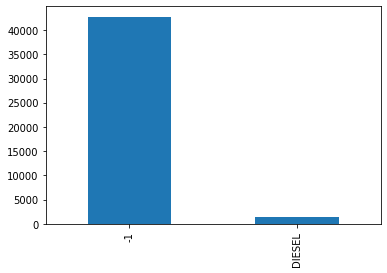

In [22]:
### fuel type in "Trailer For Commercial Use"

dddd=data1[data1['fuel'].notnull()]['vehicleClass']=='Trailer For Commercial Use'
data1.loc[dddd[dddd].index,'fuel'].value_counts().plot.bar()

In [23]:
### filling rest missing value with most occured value

catt=data1[data1['fuel'].isnull()]['vehicleClass'] == 'Trailer For Commercial Use'
data1.loc[catt[catt].index, 'fuel'] = '-1'

In [24]:
data1[data1['fuel'].isnull()]['vehicleClass'].value_counts()

Trailer for Agriculture Purpose               42391
MOTOR CYCLE                                     152
MOTOR CAR                                       105
Tractor for Agricultural Purpose                 18
Luxory Tourist Cab                               16
Motor Cab                                        15
Chassis Transport                                 9
Tractor for Commercial Use                        4
Tractor Driven Combined Harvester                 4
Goods Carriage                                    2
Three Wheeled Goods Vehicle                       2
Loader                                            2
Vehicle Fitted with Construction Equipment        1
Name: vehicleClass, dtype: int64

<AxesSubplot:>

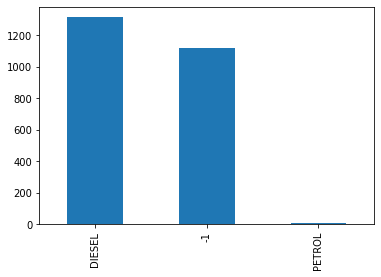

In [25]:
### Handling missing 'fuel' value of 'vehicleClass' sub category "Trailer for Agriculture Purpose"

dddd=data1[data1['fuel'].notnull()]['vehicleClass'] == 'Trailer for Agriculture Purpose'
data1.loc[dddd[dddd].index,'fuel'].value_counts().plot.bar()

In [26]:
### Gathering all notnull value of  the different catogery of model name i.e 'modelDesc' depending on its fuel type
### Gathering of fuel type value from 'vehicleClass' of 'Trailer for Agriculture Purpose'

TC = data1[data1['vehicleClass'] == 'Trailer for Agriculture Purpose']['fuel'].notnull()
TC = list(TC[TC].index)

dieselName = data1.loc[TC, 'fuel'] == 'DIESEL'
dieselName = list(dieselName[dieselName].index)
dieselName = list(data1.loc[dieselName, 'modelDesc'].unique())

petrolName = data1.loc[TC, 'fuel'] == 'PETROL'
petrolName = list(petrolName[petrolName].index)
petrolName = list(data1.loc[petrolName,'modelDesc'].unique())

oneName = data1.loc[TC, 'fuel'] == '-1'
oneName = list(oneName[oneName].index)

oneName = list(data1.loc[oneName,'modelDesc'].unique())

In [27]:
TC = data1[data1['vehicleClass'] == 'Trailer for Agriculture Purpose']['fuel'].isnull()
TC = list(TC[TC].index)
data1.loc[TC, 'modelDesc'].isin(oneName).value_counts()

True     37861
False     4530
Name: modelDesc, dtype: int64

In [28]:
### notnull fuel type model name match with nan fuel value model name

TC = data1[data1['vehicleClass'] == 'Trailer for Agriculture Purpose']['fuel'].isnull()
TC = list(TC[TC].index)
dcc=0
occ=0
pcc=0
for i in TC:
    
    if data1.loc[i, 'modelDesc'] in dieselName:
        dcc=dcc+1
        
    elif data1.loc[i, 'modelDesc'] in oneName:
        occ=occ+1
        
    elif data1.loc[i, 'modelDesc'] in petrolName:
        pcc=pcc+1
        
print("Diesel name of notnull fuel value match with nan fuel value's model name = ",dcc)
print("")
print("Petrol name of notnull fuel value match with nan fuel value's model name = ",pcc)
print("")
print("-1 name of notnull fuel value match with nan fuel value's model name = ",occ)

Diesel name of notnull fuel value match with nan fuel value's model name =  9897

Petrol name of notnull fuel value match with nan fuel value's model name =  0

-1 name of notnull fuel value match with nan fuel value's model name =  27964


In [29]:
dieN = data1.loc[TC, 'modelDesc'].isin(dieselName)

oneN = data1.loc[TC, 'modelDesc'].isin(oneName)

data1.loc[dieN[dieN].index, 'fuel'] = 'DIESEL'

data1.loc[oneN[oneN].index, 'fuel'] = '-1'

In [30]:
data1[data1['fuel'].isnull()]['vehicleClass'].value_counts()

Trailer for Agriculture Purpose               4530
MOTOR CYCLE                                    152
MOTOR CAR                                      105
Tractor for Agricultural Purpose                18
Luxory Tourist Cab                              16
Motor Cab                                       15
Chassis Transport                                9
Tractor for Commercial Use                       4
Tractor Driven Combined Harvester                4
Goods Carriage                                   2
Three Wheeled Goods Vehicle                      2
Loader                                           2
Vehicle Fitted with Construction Equipment       1
Name: vehicleClass, dtype: int64

<AxesSubplot:>

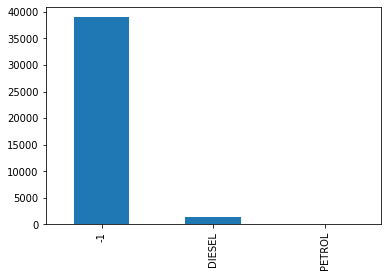

In [31]:
### fuel type in "Trailer for Agriculture Purpose"

dddd=data1[data1['fuel'].notnull()]['vehicleClass']=='Trailer for Agriculture Purpose'
data1.loc[dddd[dddd].index,'fuel'].value_counts().plot.bar()

In [32]:
### filling rest missing value with most occured value

catt=data1[data1['fuel'].isnull()]['vehicleClass'] == 'Trailer for Agriculture Purpose'
data1.loc[catt[catt].index, 'fuel'] = '-1'

In [33]:
#### handling missing values of 'MOTOR CYCLE' of vehicleClass
### fuel type in "MOTOR CYCLE"

dddd=data1[data1['fuel'].notnull()]['vehicleClass']=='MOTOR CYCLE'
data1.loc[dddd[dddd].index,'fuel'].value_counts()

PETROL        3331164
BATTERY          2397
-1                 52
DIESEL              6
PETROL LPG          1
Name: fuel, dtype: int64

In [34]:
### filling rest missing value with most occured value of 'MOTOR CYCLE'

catt=data1[data1['fuel'].isnull()]['vehicleClass'] == 'MOTOR CYCLE'
data1.loc[catt[catt].index, 'fuel'] = 'PETROL'

<AxesSubplot:>

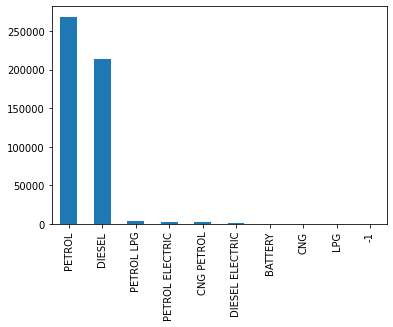

In [35]:
#### handling missing values of 'MOTOR CAR' of vehicleClass
### fuel type in "MOTOR CAR"

dddd=data1[data1['fuel'].notnull()]['vehicleClass']=='MOTOR CAR'
data1.loc[dddd[dddd].index,'fuel'].value_counts().plot.bar()

In [37]:
### Motor car missing value filled by random value i.e (Petrol,Diesel) because occurrence of both is maximum
car=data1[data1['vehicleClass'] == 'MOTOR CAR']['fuel'].isnull()

count_car = len(car[car])

np.random.seed(0)

car_varient = np.random.choice(['DIESEL','PETROL'], size=count_car)

data1.loc[car[car].index, 'fuel'] = car_varient

In [38]:
data1[data1['fuel'].isnull()]['vehicleClass'].value_counts().sort_values( ascending=False)

Tractor for Agricultural Purpose              18
Luxory Tourist Cab                            16
Motor Cab                                     15
Chassis Transport                              9
Tractor for Commercial Use                     4
Tractor Driven Combined Harvester              4
Goods Carriage                                 2
Loader                                         2
Three Wheeled Goods Vehicle                    2
Vehicle Fitted with Construction Equipment     1
Name: vehicleClass, dtype: int64

<AxesSubplot:title={'center':'Motor Cab'}>

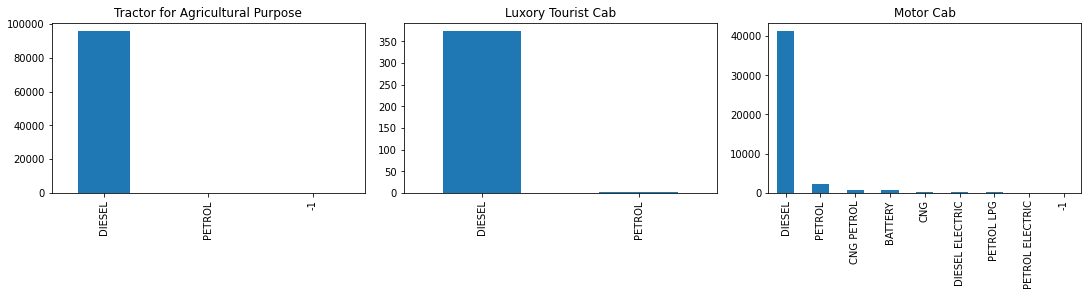

In [39]:
### maximum missing value of top 3 vehicleClass fuel varient 
val=data1[data1['fuel'].isnull()]['vehicleClass'].unique()[:3]
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,4),constrained_layout=True)

data1.loc[data1['vehicleClass']=='Tractor for Agricultural Purpose','fuel'].value_counts().plot(ax=axes[0], kind='bar', title='Tractor for Agricultural Purpose')
data1.loc[data1['vehicleClass']=='Luxory Tourist Cab','fuel'].value_counts().plot(ax=axes[1], kind='bar', title='Luxory Tourist Cab')
data1.loc[data1['vehicleClass']=='Motor Cab','fuel'].value_counts().plot(ax=axes[2], kind='bar', title='Motor Cab')


In [40]:
data1.loc[data1['fuel'].isnull(),'fuel']='DIESEL'

### Handling OfficeCd missing value

In [41]:
d=data1.isnull().sum().sort_values(ascending=False)
d[d.values>0]

OfficeCd    124715
colour        1899
dtype: int64

In [42]:
### vehicle first 4 digit number 

data1["rto"]=data1['tempRegistrationNumber'].astype(str).str[0:4]

### vehicle state 

data1['state'] = data1['rto'].astype(str).str[:2]

In [43]:
data1.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,modelDesc,fuel,colour,vehicleClass,makeYear,seatCapacity,secondVehicle,tempRegistrationNumber,category,makerName,OfficeCd,rto,state
modelDesc,1.000000,-0.022499,0.335808,0.183510,0.820866,0.099914,-0.059873,0.725742,0.005898,0.273893,-0.069988,0.462808,0.671793
fuel,-0.022499,1.000000,-0.038339,0.406701,-0.005480,0.441615,-0.012668,-0.001185,0.559288,0.177111,-0.004883,0.054854,-0.003979
colour,0.335808,-0.038339,1.000000,0.003830,0.311603,0.013031,-0.015960,0.276199,-0.051164,0.154787,-0.003161,0.197662,0.295283
vehicleClass,0.183510,0.406701,0.003830,1.000000,0.088536,0.568986,0.018941,0.087034,0.578627,0.174838,0.040791,0.150254,0.104304
makeYear,0.820866,-0.005480,0.311603,0.088536,1.000000,0.017433,-0.086418,0.769715,-0.012187,0.238105,-0.100527,0.435334,0.667152
seatCapacity,0.099914,0.441615,0.013031,0.568986,0.017433,1.000000,0.050865,0.029952,0.397745,0.235709,0.044493,0.117621,0.016793
secondVehicle,-0.059873,-0.012668,-0.015960,0.018941,-0.086418,0.050865,1.000000,-0.068224,-0.066368,0.000952,0.088495,0.005192,-0.069012
tempRegistrationNumber,0.725742,-0.001185,0.276199,0.087034,0.769715,0.029952,-0.068224,1.000000,-0.011825,0.190240,-0.046381,0.359224,0.523710
category,0.005898,0.559288,-0.051164,0.578627,-0.012187,0.397745,-0.066368,-0.011825,1.000000,0.127090,-0.046775,0.002201,-0.008445
makerName,0.273893,0.177111,0.154787,0.174838,0.238105,0.235709,0.000952,0.190240,0.127090,1.000000,-0.043104,0.257261,0.334547


In [44]:
### for OfficeCd missing values 
### 1.) group the rto and category 
### 2.) take the top 3 most frequent OfficeCd of peticular group
### 3.) randomly fill that value in perticular group

c_test=data1.groupby(['rto', 'category']).groups
for cate_rto in c_test.keys():
    
    missing_office=data1.loc[c_test[cate_rto], 'OfficeCd'].isnull().sum()
    
    if missing_office:
            
            dat = data1.loc[c_test[cate_rto], 'OfficeCd'].value_counts().sort_values(ascending=False).keys()[:3]

            count_office = data1.loc[c_test[cate_rto],'OfficeCd'].isnull().sum()
            
            np.random.seed(0)
            choice_cate = np.random.choice(dat, size=count_office)
            
            d=data1.loc[c_test[cate_rto], 'OfficeCd'].isnull()
            
            data1.loc[d[d].index, 'OfficeCd'] = choice_cate

In [45]:
d=data1.isnull().sum()
d[d>0]

colour    1899
dtype: int64

In [46]:
### Replacing Colour NIL value with most frequent colour of perticular vehicle class

d=data1['colour']=='NIL'
vehi_class = data1.loc[d[d].index, 'vehicleClass'].unique()

for clas in vehi_class:
    val = data1[data1['vehicleClass'] == clas]['colour'].value_counts().sort_values(ascending=False).keys()

    if val[0].upper() == 'NIL':
        val = val[1]
    
    else:
        val=val[0]
        
        
    d = data1[(data1['vehicleClass'] == clas)&(data1['colour']=='NIL')]
    
    data1.loc[d.index, 'colour'] = val


In [47]:
### handling colour missing value 
### filling nan value with most frequent colour of perticular vehicle class

d=data1['colour'].isnull()
vehi_class = data1.loc[d[d].index, 'vehicleClass'].unique()
data1['colour'] = data1['colour'].str.upper()

for clas in vehi_class:
    val = data1[data1['vehicleClass'] == clas]['colour'].value_counts().sort_values(ascending=False).keys()

    if val[0].upper() == 'NIL':

        print(val)
    else:
        val=val[0]

        
    d = data1[data1['vehicleClass'] == clas]['colour'].isnull()
    
    data1.loc[d[d].index, 'colour'] = val
    
    

In [48]:
data1.isnull().sum()

modelDesc                 0
fuel                      0
colour                    0
vehicleClass              0
makeYear                  0
seatCapacity              0
secondVehicle             0
tempRegistrationNumber    0
category                  0
makerName                 0
OfficeCd                  0
rto                       0
state                     0
dtype: int64

### Features play

In [49]:
### manufacturing month and manufacturing year

d=data1['makeYear'].notnull()

data1['manufacturing_year']=data1.loc[d[d].index,'makeYear'].apply(lambda x: str('20') + x.split('/')[2] if len(x.split('/')[2])==2 else x.split('/')[2])
data1['manufacturing_year'] = data1['manufacturing_year'].astype(int)

dict_month={'02':'February', '01':'January', '04':'April ', '03':'March', '05':'May', '11':'November', 
            '07':'July', '12':'December', '09':'September', '10':'October', '08':'August',
       '06':'Jun'}
data1['manufacturing_month']=data1.loc[d[d].index,'makeYear'].apply(lambda x: x.split('/')[1]).map(dict_month)

In [50]:
c=data1['manufacturing_year'].astype(int)
c[c>2020].index

Int64Index([3577031], dtype='int64')

In [52]:
data1.loc[3577031,'manufacturing_year']=1985

In [53]:
data1['howOld']=2020-data1['manufacturing_year'].astype(int)


In [54]:
data1.columns

Index(['modelDesc', 'fuel', 'colour', 'vehicleClass', 'makeYear',
       'seatCapacity', 'secondVehicle', 'tempRegistrationNumber', 'category',
       'makerName', 'OfficeCd', 'rto', 'state', 'manufacturing_year',
       'manufacturing_month', 'howOld'],
      dtype='object')

<AxesSubplot:>

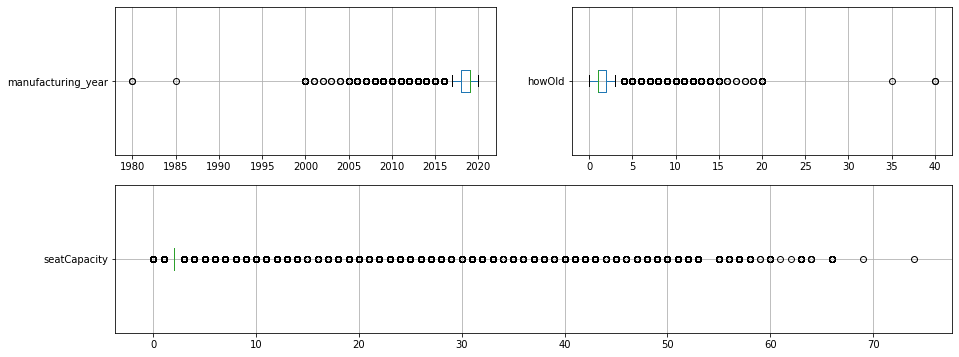

In [61]:
### maximum missing value of top 3 vehicleClass fuel varient 
#fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(15,6),constrained_layout=True)
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

data1.boxplot(column = 'manufacturing_year', ax=ax1, vert=False)
data1.boxplot(column='howOld', ax=ax2, vert=False)
data1.boxplot(column='seatCapacity', ax=ax3, vert=False)

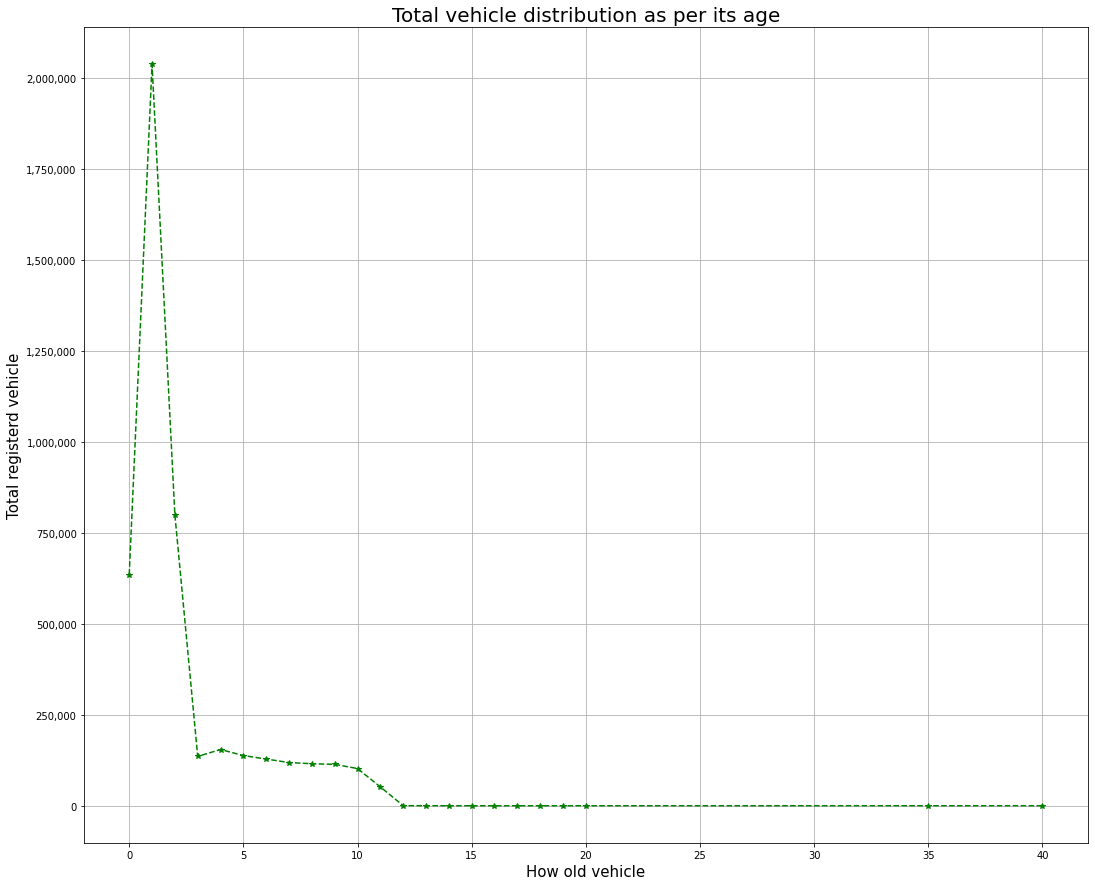

In [63]:
import matplotlib

fig, ax1 = plt.subplots(figsize=(18, 15))
c=[c for c in data1.groupby(['howOld']).groups.keys()]
cy = [len(i) for i in list(data1.groupby(['howOld']).groups.values())]
ax1.plot(c,cy, '*g--')
ax1.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.grid()
plt.xlabel("How old vehicle", axes=ax1, size=15)
plt.ylabel("Total registerd vehicle", axes=ax1, size=15)
plt.title("Total vehicle distribution as per its age", axes=ax1, size=20)
plt.show()

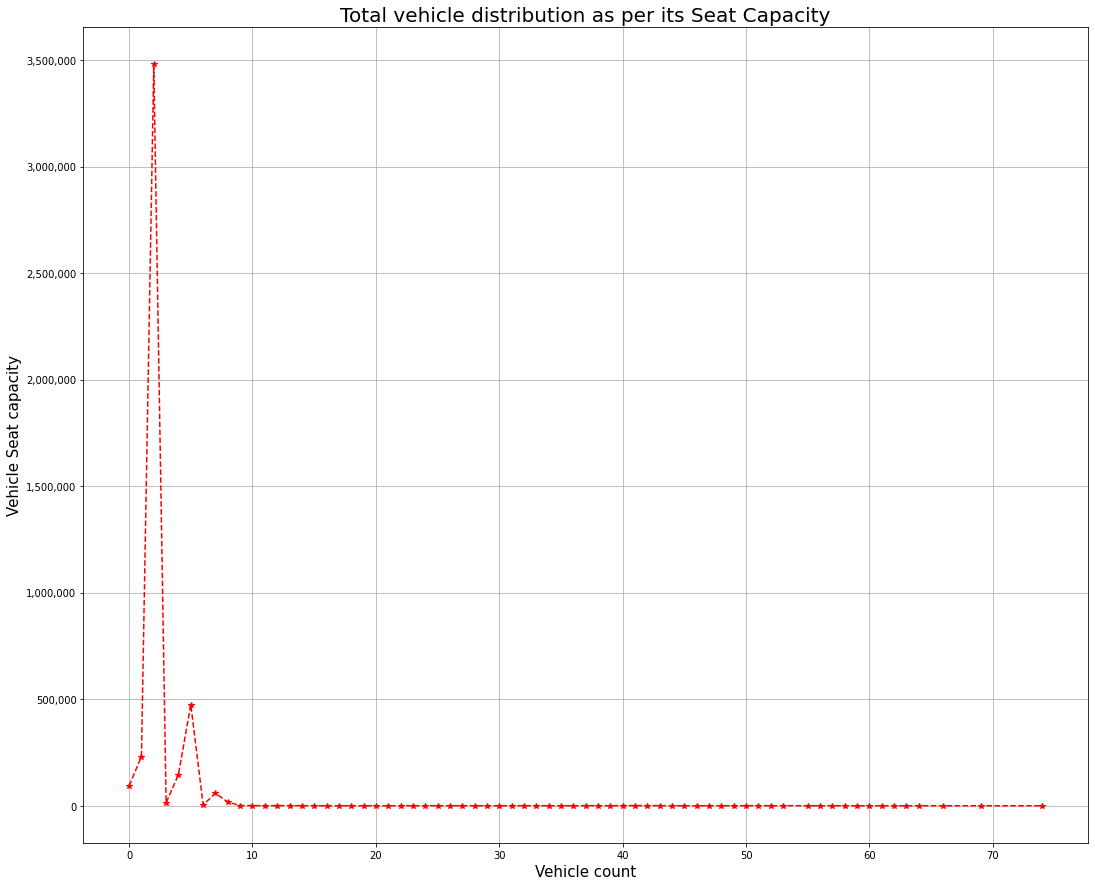

In [64]:

fig, ax1 = plt.subplots(figsize=(18, 15))
c=[c for c in data1.groupby(['seatCapacity']).groups.keys()]
cy = [len(i) for i in list(data1.groupby(['seatCapacity']).groups.values())]

ax1.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.plot(c,cy, '*r--')

#plt.xticks(keys, rotation='vertical', size=15, axes=ax1)
ax1.grid()

plt.xlabel("Vehicle count", axes=ax1, size=15)
plt.ylabel("Vehicle Seat capacity", axes=ax1, size=15)
plt.title("Total vehicle distribution as per its Seat Capacity", axes=ax1, size=20)
plt.show()

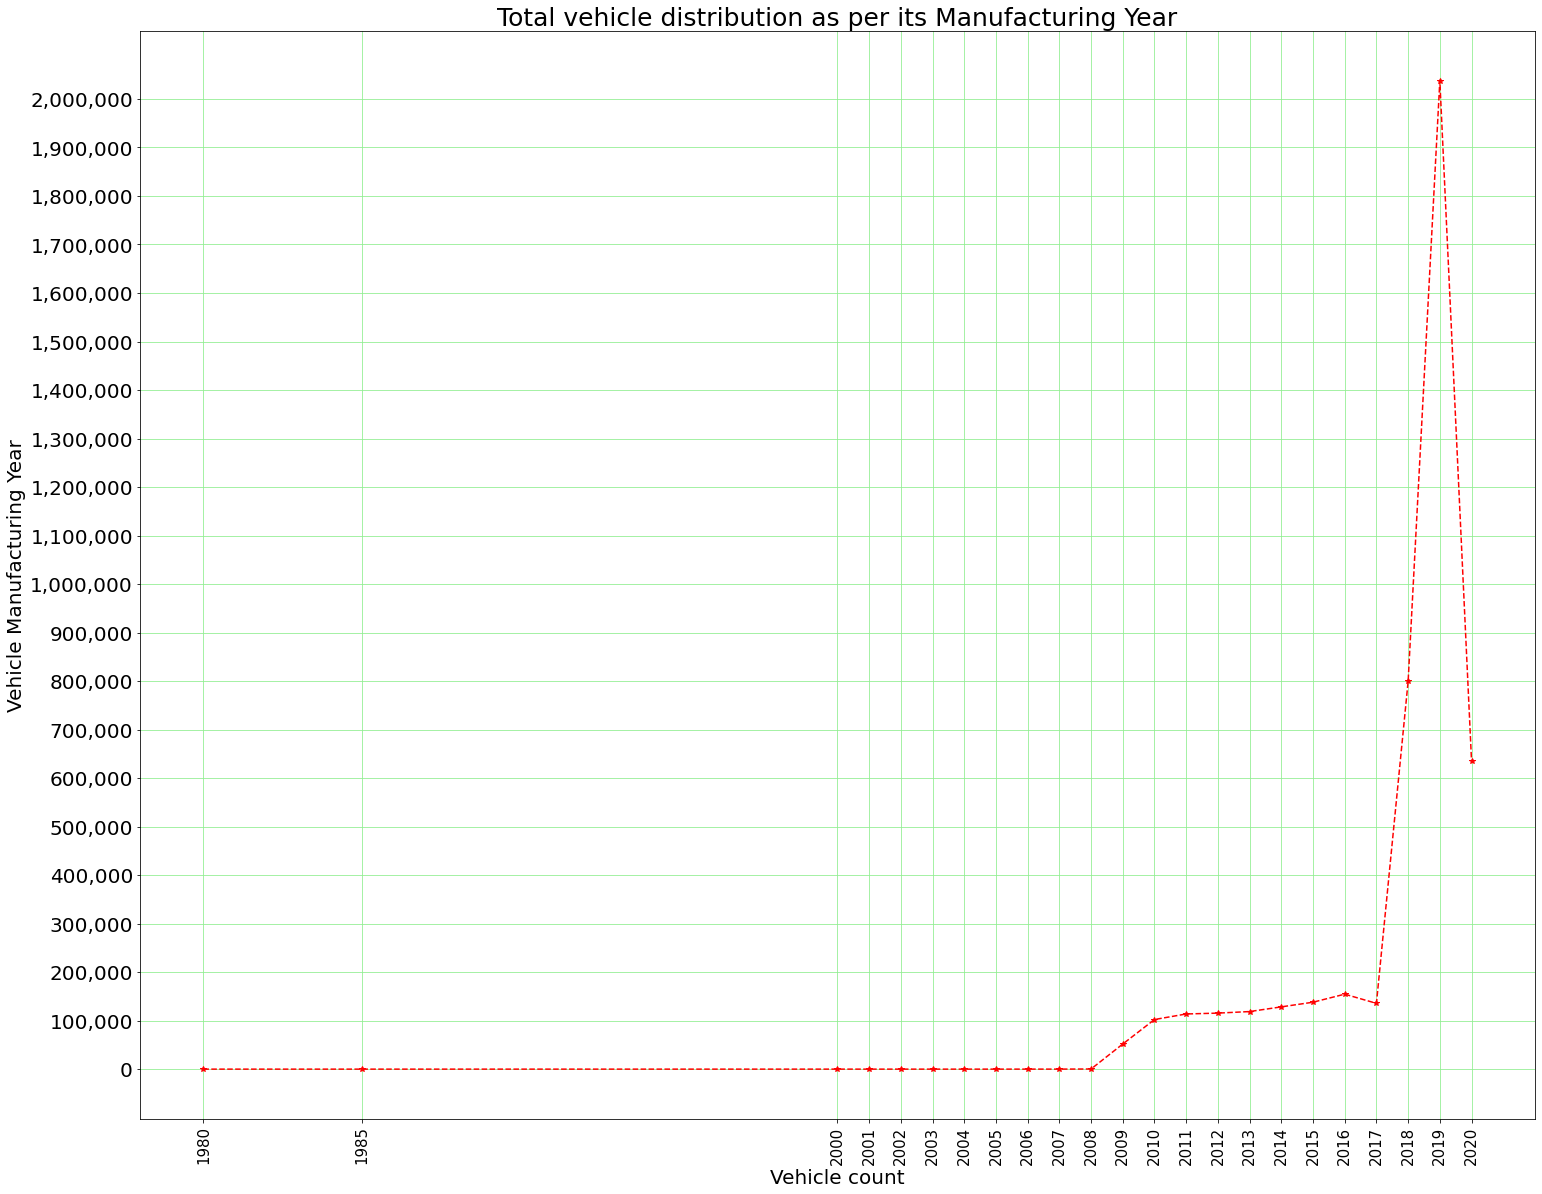

In [65]:
### year sold vehicle class

keys = [pair for pair in data1.groupby(['manufacturing_year']).groups]

fig, ax = plt.subplots(figsize=(25, 20))

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

c=[c for c in data1.groupby(['manufacturing_year']).groups.keys()]
cy = [len(i) for i in list(data1.groupby(['manufacturing_year']).groups.values())]
ax.plot(c,cy, '*r--')

plt.xticks(keys, rotation='vertical', size=15, axes=ax)
plt.yticks(np.arange(0, max(cy), 100000), axes=ax, size=20)
ax.grid(color='lightgreen')

plt.xlabel("Vehicle count", axes=ax1, size=20)
plt.ylabel("Vehicle Manufacturing Year", axes=ax1, size=20)
plt.title("Total vehicle distribution as per its Manufacturing Year", size=25)

plt.show()



In [66]:
data1['vehicleClass'].unique()

array(['MOTOR CYCLE', 'Tractor for Agricultural Purpose',
       'Trailer for Agriculture Purpose', 'Tractor for Commercial Use',
       'Vehicle Fitted with Construction Equipment',
       'Trailer For Commercial Use', 'Tractor Driven Combined Harvester',
       'SELF PROPELLED HARVESTER', 'MOTOR CAR', 'Auto Rickshaw', 'Loader',
       'Motor Cab', 'Three Wheeled Goods Vehicle', 'Goods Carriage',
       'Maxi Cab', 'Omnibus for Private Use', 'Crane For Private Use',
       'Ambulance', 'Chassis Transport', 'Road Roller', 'Fork Lift',
       'Ominibus', 'eCart', 'Auto Rikckshaw Private',
       'Self Loading Concrete Mixer', 'Motor Cycle for Hire', 'Jeep',
       'eRickshaw', 'Mopeds and Motorised Cycle', 'Articulated Vehicles',
       'MOTOR GRADER', 'Luxory Tourist Cab', 'Education Institute Bus',
       'Stage Carriages', 'Contract Carriage ', 'Private Service Vehicle',
       'Invalid Carriage', 'Crane Mounted', 'Crane For Commercial Use'],
      dtype=object)

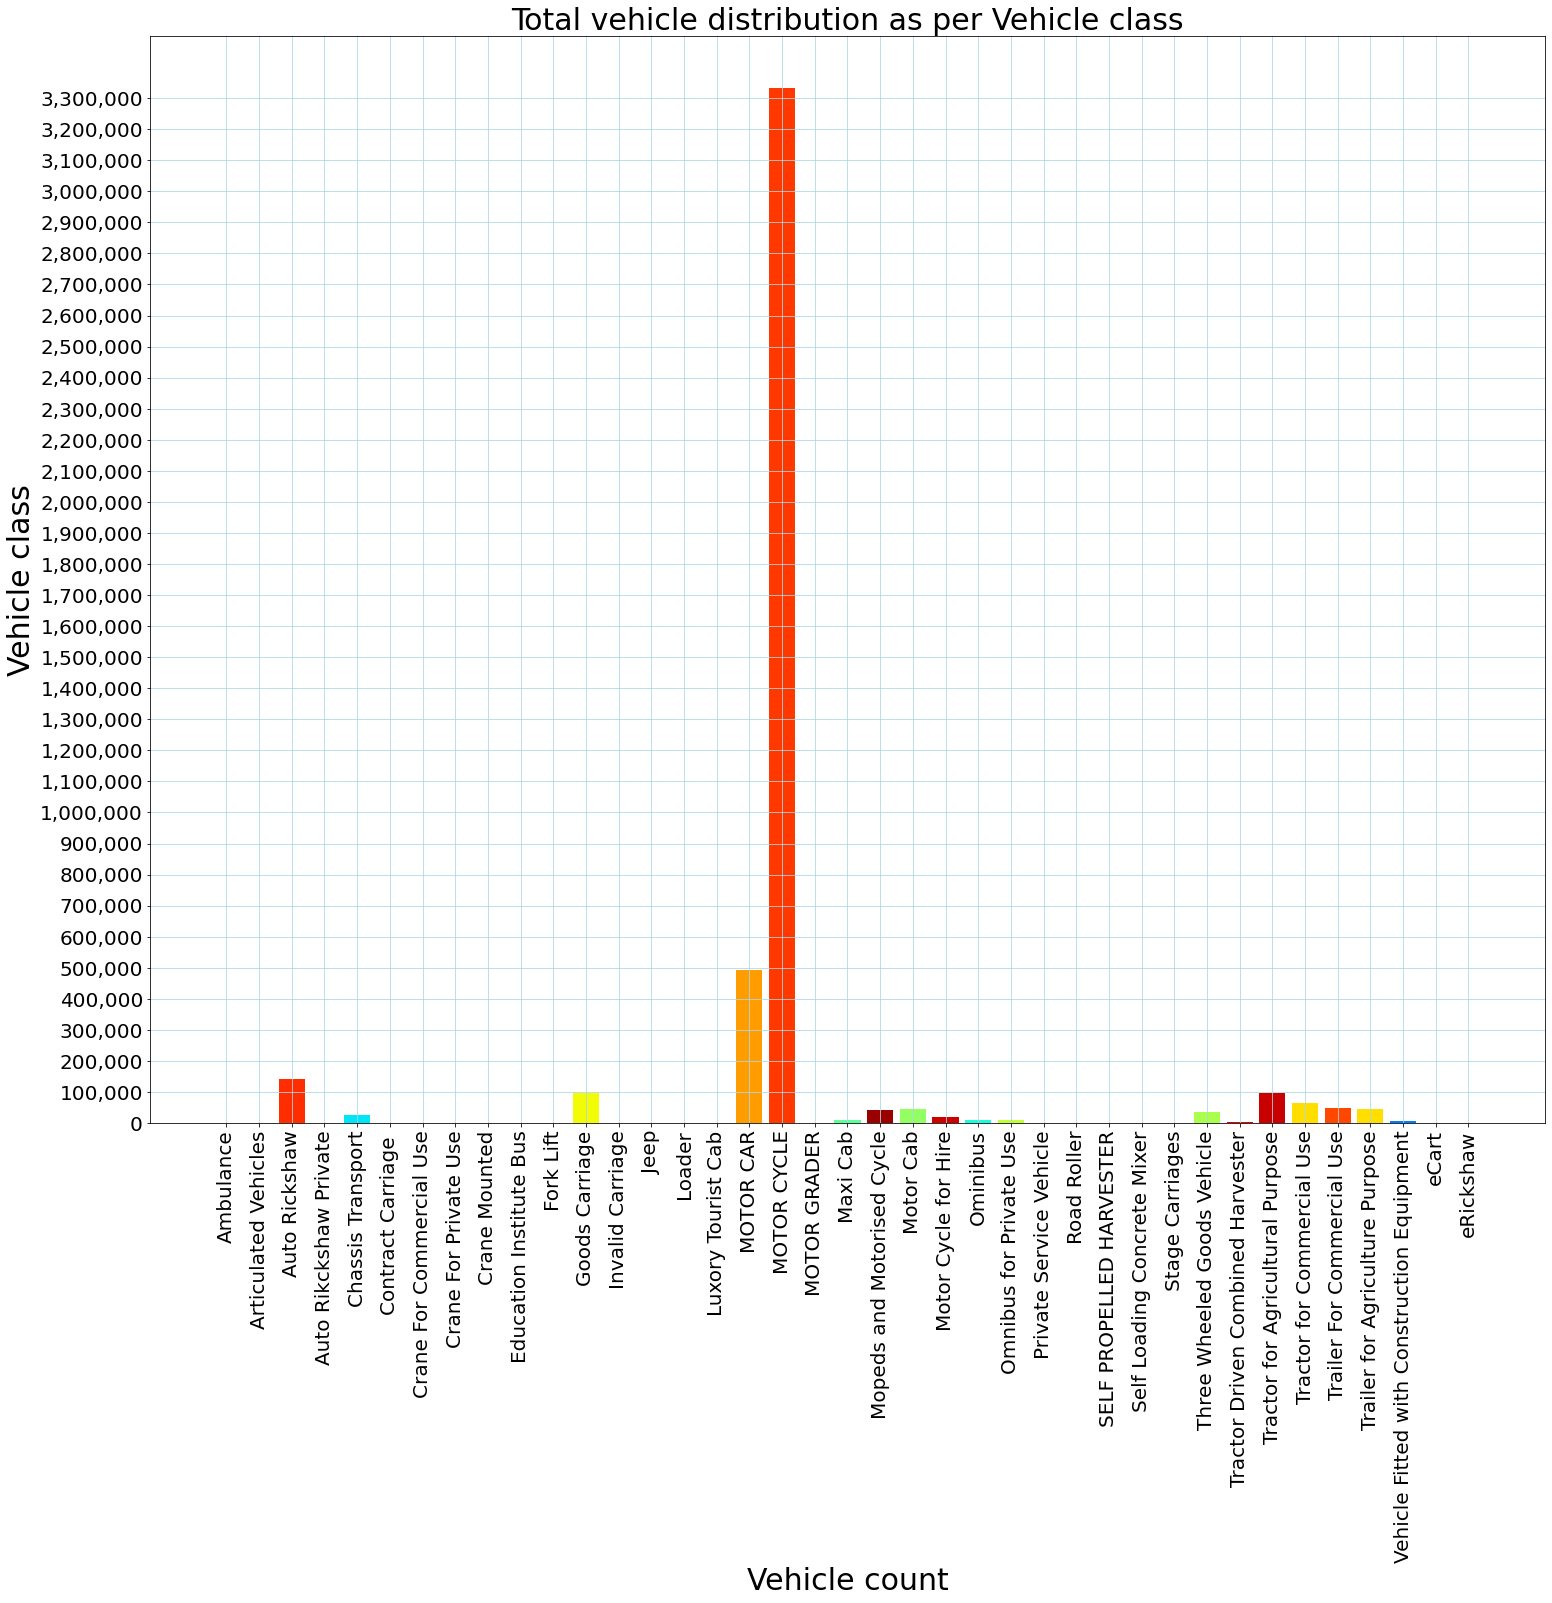

In [68]:
from random import randrange


c=[i for i in data1.groupby(['vehicleClass']).groups.keys()]
cy=[len(i) for i in data1.groupby('vehicleClass').groups.values()]
fig, ax =plt.subplots(figsize=(25, 20))

c_data = [randrange(50,250) for i in range(len(c))]
my_cmap = matplotlib.cm.get_cmap('jet')

plt.bar(c, cy, axes=ax, color=my_cmap(c_data))

plt.xticks(c, rotation='vertical', axes=ax, size=20)
plt.yticks(np.arange(0, max(cy), 100000), axes=ax, size=20)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel("Vehicle count", axes=ax, size=30)
plt.ylabel("Vehicle class", axes=ax, size=30)
plt.title("Total vehicle distribution as per Vehicle class", axes=ax, size=30)
plt.grid(color='lightblue')

plt.show()